# Prieskumná analýza datasetu č.17

Autori: Andrea Dická a Ján Nemčík
Cvičenie: Piatok, 8:00


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [4]:
data = pd.read_csv("17/train.csv", sep=',', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,,,,,,,,,,,,,,,,,,,,,
NaN,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0.0,53.0,M,f,f,f,f,f,f,0.3,t,...,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
1.0,73.0,M,f,f,f,f,f,f,2.1,t,...,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2.0,73.0,F,f,f,f,f,f,f,1.6,t,...,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3.0,24.0,M,f,f,f,f,f,f,1.3,t,...,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


In [ ]:
data.count()

Vidíme, že máme k dispozícii 2801 záznamov. Zdá sa, že väčšina stĺpcov obsahuje všetky dáta.

In [5]:
data = data.rename(columns=data.iloc[0]).drop(data.index[0])
data.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,...,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,,,,,,,,,,,,,,,,,,,,,
0.0,53.0,M,f,f,f,f,f,f,0.3,t,...,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
1.0,73.0,M,f,f,f,f,f,f,2.1,t,...,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2.0,73.0,F,f,f,f,f,f,f,1.6,t,...,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3.0,24.0,M,f,f,f,f,f,f,1.3,t,...,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
4.0,25.0,F,f,f,f,f,f,f,468.0,t,...,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2800 entries, 0.0 to 2799.0
Data columns (total 34 columns):
age                          2799 non-null object
sex                          2800 non-null object
query on thyroxine           2800 non-null object
on antithyroid medication    2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
tumor                        2800 non-null object
hypopituitary                2800 non-null object
TSH                          2516 non-null object
T3 measured                  2800 non-null object
T3                           2215 non-null object
TT4 measured                 2800 non-null object
TT4                          2616 non-null object
T4U                          2503 non-null object
FTI measured                 2800 non-null object
FTI                          2800 non-null object
TBG measured                 2800 non-null object
TBG                          2800 non

In [9]:
 data['age'].value_counts()

59.0       69
70.0       67
60.0       60
63.0       59
55.0       56
72.0       56
73.0       52
68.0       51
34.0       48
65.0       48
61.0       47
57.0       46
64.0       46
37.0       45
53.0       45
67.0       45
62.0       44
58.0       42
75.0       42
69.0       41
54.0       41
35.0       40
38.0       40
29.0       39
41.0       39
71.0       38
78.0       37
56.0       37
25.0       37
44.0       37
           ..
-6300.0     1
-3400.0     1
-1300.0     1
-8800.0     1
3000.0      1
-2300.0     1
5200.0      1
4.0         1
-3800.0     1
92.0        1
-6800.0     1
3800.0      1
2000.0      1
-2400.0     1
6800.0      1
-4700.0     1
2300.0      1
8500.0      1
-6700.0     1
-700.0      1
3300.0      1
-1900.0     1
-2800.0     1
-8900.0     1
-8300.0     1
3600.0      1
-2900.0     1
-5100.0     1
1500.0      1
10.0        1
Name: age, Length: 218, dtype: int64

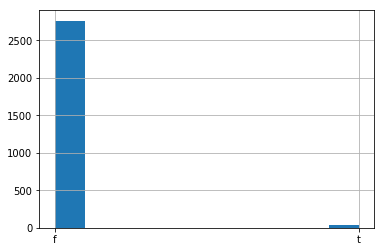

In [6]:
data['query on thyroxine'].hist()

In [62]:
class Transform(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df
    

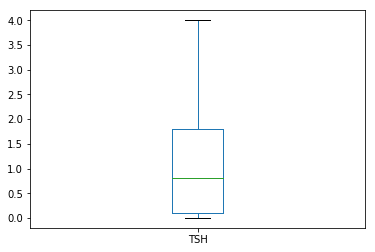

In [59]:
data["TSH"] = np.array(data["TSH"]).astype(np.float)
data["TSH"].plot(kind="box")

j=0
for i in data['TSH']:
    if(i > 10.0):
        i /= 100.0
        data["TSH"][j] = i
    j += 1

data["TSH"].plot(kind="box")

In [46]:
from datetime import date
import datetime

def guess_date(string):
    for fmt in ["%Y/%m/%d", "%Y%m%d", "%y-%m-%d", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H %M %S", "%d/%m/%Y"]:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)

i = 0
for date in data['date_of_birth']:
    
    if(str(date) != 'nan'):        
        aa = guess_date(str(date))
        data['date_of_birth'][i] = aa
    i += 1
        

In [49]:
data['date_of_birth'].describe()
    

count           2799
unique          2660
top       1954-07-23
freq               3
Name: date_of_birth, dtype: object

In [60]:
data['referral source'].unique()

array(['SVHC', 'SVI', 'other', 'Other', 'sVHC', 'sVI', 'STMW', 'SVHD',
       'sTMW', 'sVHD'], dtype=object)

In [64]:
ppl = Pipeline([
              ('name1', Transform('referral source', 'SVHC', 'svhc')),
              ('name2', Transform('referral source', 'SVI', 'svi')),
              ('name3', Transform('referral source', 'Other', 'other')),
              ('name4', Transform('referral source', 'sVHC', 'svhc')),
              ('name5', Transform('referral source', 'sVI', 'svi')),
              ('name6', Transform('referral source', 'STMW', 'stmw')),
              ('name7', Transform('referral source', 'SVHD', 'svhd')),
              ('name8', Transform('referral source', 'sTMW', 'stmw')),
              ('name9', Transform('referral source', 'sVHD', 'svhd')),
      ])

model = ppl.fit(data)
data = model.transform(data)
data['referral source'].unique()

array(['svhc', 'svi', 'other', 'stmw', 'svhd'], dtype=object)

In [ ]:
data[]